<a href="https://colab.research.google.com/github/mumng/100-Prisoners-Problem/blob/main/%5B2%EA%B0%95%5D_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C_%EC%86%90%EA%B8%80%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨(MNIST) 분류기 만들기

- 이번 실습에서는 손글씨 숫자 데이터셋(MNIST)을 사용하여 분류 모델을 학습하고 평가하는 방법을 배웁니다. 단계별로 데이터 전처리, 모델 학습, 평가 및 결과 시각화를 수행하여 머신러닝의 기본 개념을 이해할 수 있습니다.

- `28*28 pixel` 을 `784` 개의 숫자로 표현한 데이터를 입력으로 받아 `0~9` 사이에 어떤 숫자인 지 맞추는 문제입니다.모델 구축부터 학습 및 평가까지 진행하여 `분류 정확도를 91.6% 이상`으로 만듭니다.

```
실습목표
1. MNIST 데이터셋을 불러와서 모델에 입력가능하도록 변경합니다.(전처리, 분할)
2. 로지스틱회귀 모델을 불러와서 학습시킵니다.
3. 모델의 성능을 평가하고 예측 결과를 시각화합니다.

```



```
실습단계
1. 라이브러리 임포트
2. 데이터셋 로드 및 전처리
3. 모델 로드
4. 모델 학습
5. 모델 평가 및 예측
6. 결과 시각화

```


### 1.라이브러리 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

### 2.데이터셋 로드 및 전처리
- MNIST 데이터셋을 로드하고 분할 및 스케일링해줍니다.


In [ ]:
# MNIST 데이터셋 로드
mnist = fetch_openml(__)
X, y = mnist["data"], mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# 데이터를 0-9까지의 숫자로 변환
y = y.astype(np.int16)

In [ ]:
# X 데이터 확인
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# y 데이터 확인
y[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int16

분할 시에, `sklearn train_test_split` 모듈 사용하며,
입력으로 허용되는 array 는 다음과 같다.


> __Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.__





In [ ]:
# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = __(__,__, test_size=__, random_state=42)

> 정규화를 하는 이유는?
1. 모델이 특정 특성에만 불균형하게 학습되는 것 방지
2. 모델 수렴 속도 향상 시킨다.
3. (표준정규화를 쓰는이유는) 데이터를 표준화하여 모델의 성능을 일관성있게 뱉어준다.

In [ ]:
# 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_train = scaler.__(X_train)
X_test = scaler.__(X_test)

### 3.모델 로드
- 로지스틱 회귀 모델을 로드합니다.

- max_iter = 100 - 100번 반복해서 학습
- solver = 'lbfgs'- 대규모 데이터셋에 효율적임 , 작은데이터에는 'liblinear' 가 더 나을 수도 있음
- multi_class = 'auto'- 자동으로 이진/다중 클래스 분류 선택
- verbose = 1 - 학습결과에 대해 어느정도로 보여줄지 정도를 표시하는 파라미터

In [ ]:
# 로지스틱 회귀 모델 로드
model = __(max_iter=__, solver=__, multi_class='auto',verbose=1)

### 4.모델 학습
- train 데이터를 사용하여 모델을 학습시킵니다.


> 학습 진행 경과를 보고싶다면?!
 - model 정의할때, verbose 파라미터 조정하기

In [ ]:
# 모델 학습
model.__(__, __)

[LibLinear]

LogisticRegression(max_iter=1000, solver='liblinear', verbose=1)

### 5.모델 평가 및 예측
- 테스트 데이터를 사용하여 모델을 평가하고 예측합니다.

In [ ]:
# 테스트 세트를 사용하여 예측 수행
y_pred = model.predict(__)

# 모델 평가
accuracy = accuracy_score(__, __)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print(__(y_test, y_pred))

Accuracy: 0.9140714285714285
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.93      0.97      0.95      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.92      0.93      0.93      1503
           8       0.89      0.84      0.86      1357
           9       0.90      0.88      0.89      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



### 6.결과 시각화
- 예측 결과를 시각화하여 실제 레이블과 비교합니다.

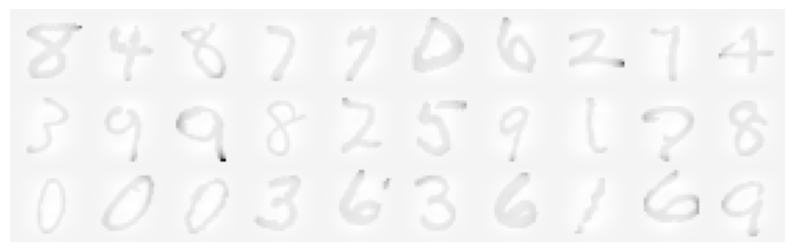

----------------------------------------------------------------------------------------------------
Labels: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8 0 0 0 3 6 3 6 1 6 9]
Predicted: [8 4 5 7 7 0 6 2 7 7 3 7 9 8 2 5 9 1 7 8 0 0 0 3 6 3 6 1 6 9]
틀림:8인데, 5로 예측
틀림:4인데, 7로 예측
틀림:9인데, 7로 예측


In [ ]:
# 몇 가지 예측 결과 시각화
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

# 테스트 세트에서 처음 30개의 이미지와 예측 결과를 시각화
some_images = X_test[:30]
some_labels = y_test[:30].values
some_predicted = y_pred[:30]

plt.figure(figsize=(10,10))
plot_digits(some_images)
plt.show()
print("-"*100)
print("Labels:",some_labels)
print("Predicted:", some_predicted)

for i,j in zip(some_labels,some_predicted):
    if i!=j:
        print(f"틀림:{i}인데, {j}로 예측")